In [1]:
import numpy as np
from array import *
import matplotlib.pyplot as plt
import os
import time
import glob
import dunestyle.matplotlib as dunestyle
import pandas as pd

DUNE plot style enabled


In [2]:
# Specify the folder where the files are located
folder_path = 'plots/'

# Use glob to find all files matching the pattern in the specified folder
pattern = os.path.join(folder_path, 'limits*.dat')

# Get all files matching the pattern
files = sorted(glob.glob(pattern))

# Move the first 4 files to the last place
if len(files) > 4:
    files = files[4:] + files[:4]

# Initialize a list of 5 empty lists, one for each line
limits = [[] for _ in range(5)]

# Read each file
for file in files:
    with open(file, 'r') as f:
        # Read each line and store it in the appropriate list
        for i, line in enumerate(f.readlines()):
            number = float(line.strip())  # Convert the line to an integer
            limits[i].append(number)  # Add the number to the appropriate list


In [3]:
# Print each list of numbers
for i, values in enumerate(limits, start=1):
    print(f"Numbers from line {i} across all files: {values}")

Numbers from line 1 across all files: [1.053053053053053e-06, 1.2627627627627627e-06, 1.9629629629629627e-06, 3.133133133133133e-06, 1.6454454454454455e-07, 2.2612612612612612e-07, 3.776776776776777e-07, 7.277277277277276e-07, 9.66866866866867e-08, 1.7282282282282281e-07, 2.654654654654655e-07, 6.531531531531531e-07]
Numbers from line 2 across all files: [2.7967967967967966e-06, 3.3198198198198203e-06, 5.028528528528528e-06, 8.306306306306306e-06, 3.763163163163163e-07, 5.218218218218218e-07, 8.645645645645647e-07, 1.642142142142142e-06, 2.2452452452452452e-07, 3.95045045045045e-07, 6.173173173173173e-07, 1.5135135135135135e-06]
Numbers from line 3 across all files: [3.0180180180180177e-06, 3.657657657657658e-06, 5.366366366366366e-06, 9.01001001001001e-06, 4.1407407407407405e-07, 5.820820820820821e-07, 9.55855855855856e-07, 1.7892892892892892e-06, 2.413113113113113e-07, 4.340840840840841e-07, 6.724724724724725e-07, 1.6801801801801801e-06]
Numbers from line 4 across all files: [4.75525

In [4]:
limits

[[1.053053053053053e-06,
  1.2627627627627627e-06,
  1.9629629629629627e-06,
  3.133133133133133e-06,
  1.6454454454454455e-07,
  2.2612612612612612e-07,
  3.776776776776777e-07,
  7.277277277277276e-07,
  9.66866866866867e-08,
  1.7282282282282281e-07,
  2.654654654654655e-07,
  6.531531531531531e-07],
 [2.7967967967967966e-06,
  3.3198198198198203e-06,
  5.028528528528528e-06,
  8.306306306306306e-06,
  3.763163163163163e-07,
  5.218218218218218e-07,
  8.645645645645647e-07,
  1.642142142142142e-06,
  2.2452452452452452e-07,
  3.95045045045045e-07,
  6.173173173173173e-07,
  1.5135135135135135e-06],
 [3.0180180180180177e-06,
  3.657657657657658e-06,
  5.366366366366366e-06,
  9.01001001001001e-06,
  4.1407407407407405e-07,
  5.820820820820821e-07,
  9.55855855855856e-07,
  1.7892892892892892e-06,
  2.413113113113113e-07,
  4.340840840840841e-07,
  6.724724724724725e-07,
  1.6801801801801801e-06],
 [4.755255255255255e-06,
  5.744744744744745e-06,
  8.494494494494494e-06,
  1.424024024

In [5]:

# lighter DM mass
MB = np.array([5,10,20,40])
# gamma
gam = np.array([1.1, 1.5, 10])
# Heavy DM mass = Lighter DM mass * gamma
MA = np.reshape(np.multiply.outer(gam,MB),12)
print(MA)
PhenPaperSensitivity =  [6.12877527e-07, 8.28514808e-07, 1.23738536e-06, 2.19586539e-06,
 2.75543123e-07, 3.90073889e-07, 6.29320177e-07, 1.21236806e-06,
 1.54204697e-07, 2.72382985e-07, 4.46945198e-07, 1.04557268e-06]
#[6.12877527e-07, 8.28514808e-07, 1.23738536e-06, 2.19586539e-06, 2.75543123e-07, 3.90073889e-07, 6.29320177e-07, 1.21236806e-06, 1.54204697e-07, 2.72382985e-07, 4.46945198e-07, 1.04557268e-06]

[  5.5  11.   22.   44.    7.5  15.   30.   60.   50.  100.  200.  400. ]


In [6]:
from matplotlib.ticker import FixedLocator, NullLocator, ScalarFormatter

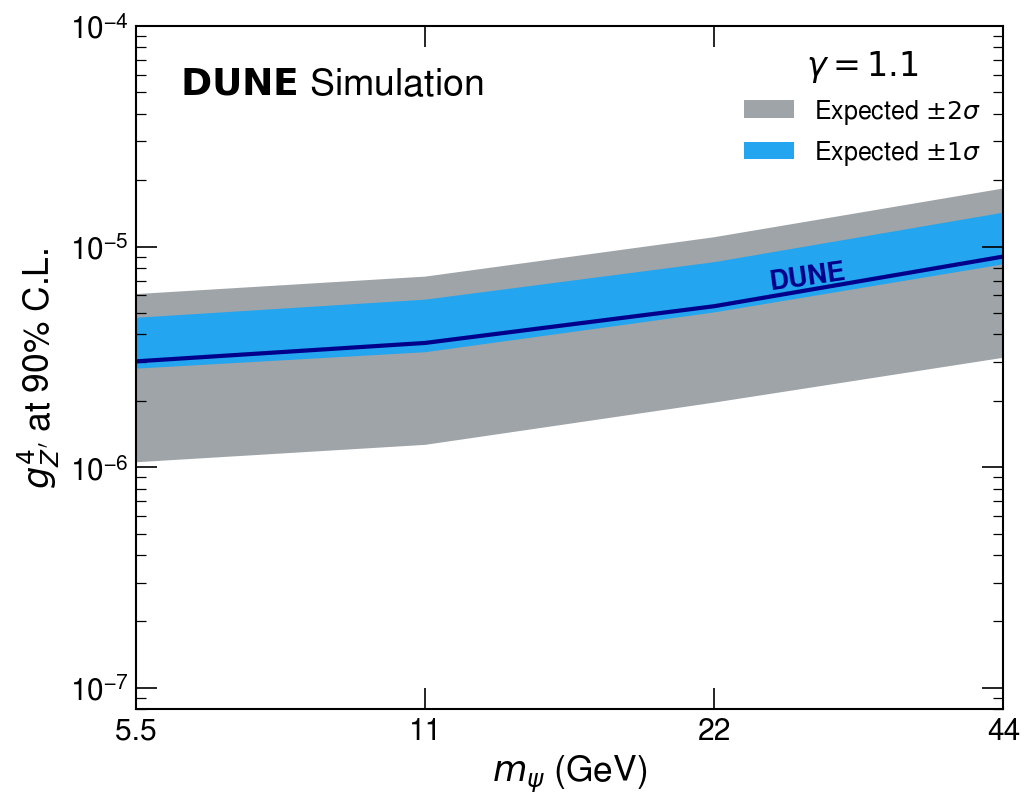

In [15]:
################################################################
#                 PLOT FIGURE          gamma = 1.1             #
################################################################

fig, ax = plt.subplots(figsize=(7.0, 5.5), dpi=150)

# Colors
c_pheno = "#4D4D4D"
c_pico = "#E68613"
c_lz = "#1C77C3"
sig2 = "#3F4B52"
sig1 = "#23A5F0"
sk = "#0A5337"


#plt.fill_between(m_p, gZ4_PICO, 1, alpha=0.3,label = 'PICO 60L, p', color = 'darkgreen')
# Lines
line_this, = ax.plot(MA[0:4], limits[2][0:4], color = 'darkblue',lw=2.,ls='-')
# Bands
band_2s = ax.fill_between(
    MA[0:4], limits[0][0:4], limits[4][0:4], color=sig2,alpha=0.5, ec=None,
    label=r'Expected $\pm 2\sigma$'
)

band_1s = ax.fill_between(
    MA[0:4], limits[1][0:4], limits[3][0:4], color=sig1,alpha=1.,ec=None,
    label=r'Expected $\pm 1\sigma$'
)


# ---- Axes ----
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(8e-8, 1e-4)
ax.set_xlim(5.5, 44)

ax.set_xlabel(r'$m_\psi$ (GeV)', fontsize=17)
ax.set_ylabel(r'$g_{Z^\prime}^4$ at 90% C.L.', fontsize=17)

# ---- Curve labels INSIDE plot ----
#ax.text(12, limits[2][1] * 1.10, "This Work", color=c_this, fontsize=14)
ax.text(25, PhenPaperSensitivity[0] * 10.5, "DUNE", fontsize=13, rotation=8, fontweight='bold', color='darkblue')

# disable ALL minor ticks on x axis
ax.xaxis.set_minor_locator(NullLocator())

# prevent Matplotlib from adding extra log ticks
ax.xaxis.set_major_locator(FixedLocator(MA[0:4]))

# avoid scientific notation on axis
ax.get_xaxis().set_major_formatter(ScalarFormatter())

ax.set_xticks(MA[0:4])
ax.set_xticklabels(['5.5','11','22','44'])

dunestyle.Simulation()
# ---- Legend only for bands ----
ax.legend(title = r'$\gamma = 1.1$', frameon=False, fontsize=12, loc="upper right", title_fontsize=16)

plt.tight_layout()
plt.savefig("clean_plot_paper_gamma1p1.pdf")
plt.show()


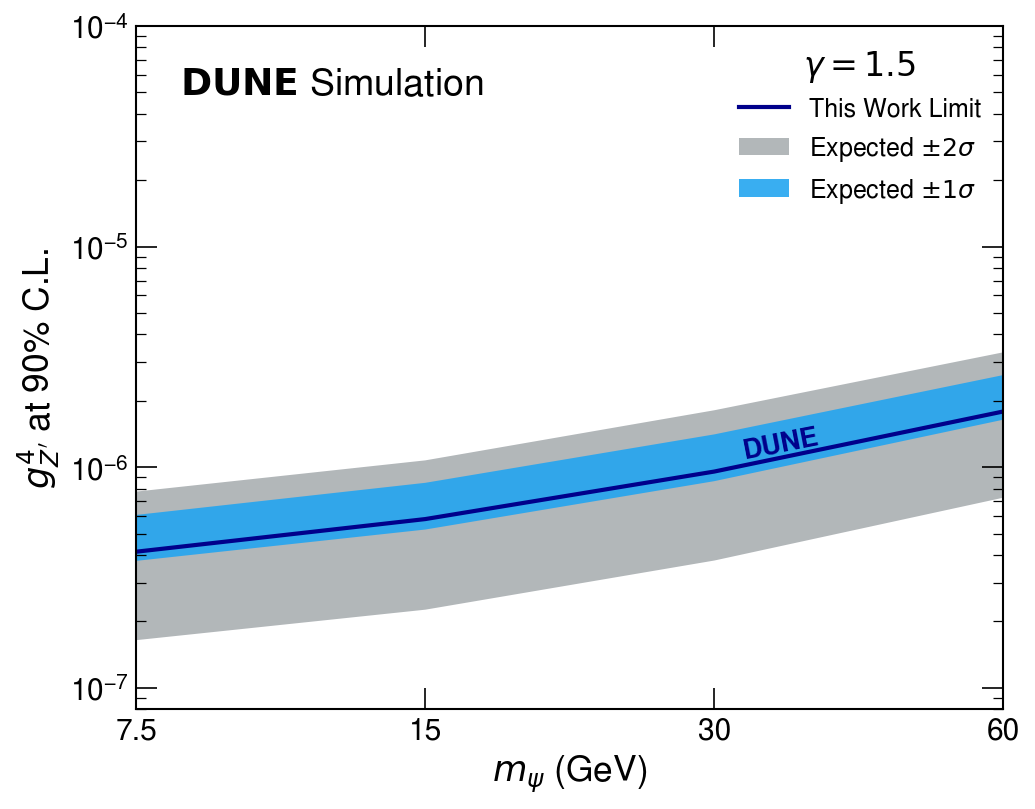

In [16]:

################################################################
#                 PLOT FIGURE          gamma = 1.5             #
################################################################
fig, ax = plt.subplots(figsize=(7.0, 5.5), dpi=150)

#plt.fill_between(m_p, gZ4_PICO, 1, alpha=0.3,label = 'PICO 60L, p', color = 'darkgreen')
# Lines
line_this, = ax.plot(MA[4:8], limits[2][4:8], lw=2., color='darkblue',ls='-', label = 'This Work Limit')


# Bands
band_2s = ax.fill_between(
    MA[4:8], limits[0][4:8], limits[4][4:8],
    alpha=0.4, label=r'Expected $\pm 2\sigma$',color=sig2,ec=None
)
band_1s = ax.fill_between(
    MA[4:8], limits[1][4:8], limits[3][4:8],
    alpha=0.90, label=r'Expected $\pm 1\sigma$', color=sig1, ec=None
)


# ---- Axes ----
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(8e-8, 1e-4)
ax.set_xlim(7.5, 60)

ax.set_xlabel(r'$m_\psi$ (GeV)', fontsize=17)
ax.set_ylabel(r'$g_{Z^\prime}^4$ at 90% C.L.', fontsize=17)

# ---- Curve labels INSIDE plot ----
#ax.text(12, limits[2][1] * 1.10, "This Work", color=c_this, fontsize=14)
ax.text(32, PhenPaperSensitivity[0] * 1.8, "DUNE", color='darkblue', fontsize=13, rotation=11, fontweight='bold')

# disable ALL minor ticks on x axis
ax.xaxis.set_minor_locator(NullLocator())

# prevent Matplotlib from adding extra log ticks
ax.xaxis.set_major_locator(FixedLocator(MA[0:4]))

# avoid scientific notation on axis
ax.get_xaxis().set_major_formatter(ScalarFormatter())

ax.set_xticks(MA[4:8])
ax.set_xticklabels(['7.5','15','30','60'])

dunestyle.Simulation()
# ---- Legend only for bands ----
ax.legend(title = r'$\gamma = 1.5$', frameon=False, fontsize=12, loc="upper right", title_fontsize=16)

plt.tight_layout()
plt.savefig("clean_plot_paper_gamma1p5.pdf")
plt.show()




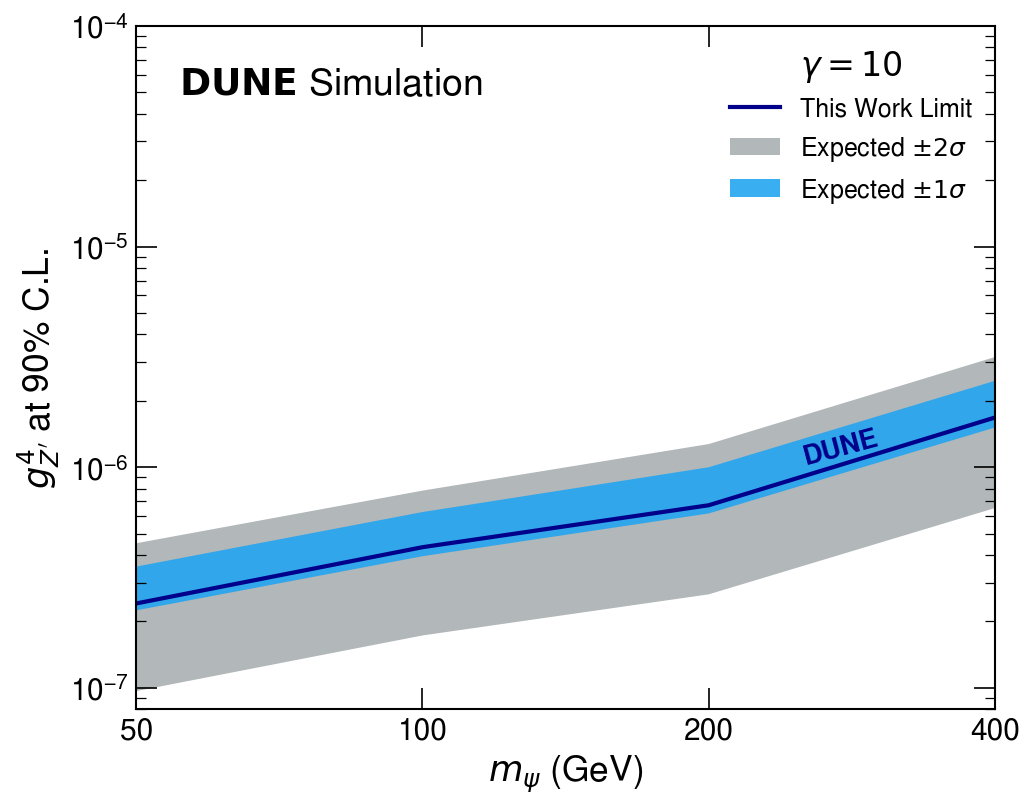

In [17]:
################################################################
#                 PLOT FIGURE          gamma = 10              #
################################################################
fig, ax = plt.subplots(figsize=(7.0, 5.5), dpi=150)


#plt.fill_between(m_p, gZ4_PICO, 1, alpha=0.3,label = 'PICO 60L, p', color = 'darkgreen')
# Lines
line_this, = ax.plot(MA[8:12], limits[2][8:12], lw=2., color='darkblue',ls='-', label = 'This Work Limit')


# Bands
band_2s = ax.fill_between(
    MA[8:12], limits[0][8:12], limits[4][8:12],
    alpha=0.4, label=r'Expected $\pm 2\sigma$',color=sig2,ec=None
)
band_1s = ax.fill_between(
    MA[8:12], limits[1][8:12], limits[3][8:12],
    alpha=0.90, label=r'Expected $\pm 1\sigma$', color=sig1, ec=None
)


# ---- Axes ----
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(8e-8, 1e-4)
ax.set_xlim(50, 400)

ax.set_xlabel(r'$m_\psi$ (GeV)', fontsize=17)
ax.set_ylabel(r'$g_{Z^\prime}^4$ at 90% C.L.', fontsize=17)

# ---- Curve labels INSIDE plot ----
#ax.text(12, limits[2][1] * 1.10, "This Work", color=c_this, fontsize=14)
ax.text(250, PhenPaperSensitivity[0] * 1.7, "DUNE", color='darkblue', fontsize=13, rotation=15, fontweight='bold')

# disable ALL minor ticks on x axis
ax.xaxis.set_minor_locator(NullLocator())

# prevent Matplotlib from adding extra log ticks
ax.xaxis.set_major_locator(FixedLocator(MA[8:12]))

# avoid scientific notation on axis
ax.get_xaxis().set_major_formatter(ScalarFormatter())

ax.set_xticks(MA[8:12])
ax.set_xticklabels(['50','100','200','400'])

dunestyle.Simulation()
# ---- Legend only for bands ----
ax.legend(title = r'$\gamma = 10$', frameon=False, fontsize=12, loc="upper right", title_fontsize=16)

plt.tight_layout()
plt.savefig("clean_plot_paper_gamma10.pdf")
plt.show()


